# Logistic regression model in Julia

The logistic regression model is a binary classification model which output, which target, is true or false, is 1 or zero, is yes or no.
The function that we will use here is the sigmoid function, the logistic function. $$g(z(a,b;x)) = \dfrac{1}{1+e^{-z}}$$
with $z = \mathbf a \cdot \mathbf x + b$.

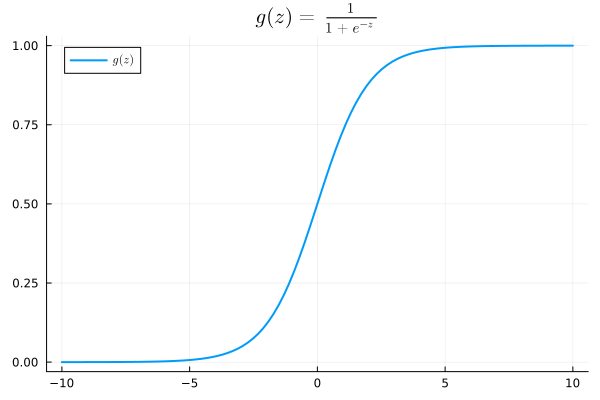

In [26]:
using Plots
using LaTeXStrings
z = range(-10, 10, length=100)
g(z) = 1/(1+ ℯ^(-z))
plot(z, g.(z), label = L"g(z)",linewidth=2)
title!(L"g(z)=\dfrac{1}{1+e^{-z}}")

This function kinds of represents the probabilities of the class being zero or one. $g_{a,b} (x) = P(y=1|\mathbf x; \mathbf a, b)$ we can value the probabiliti for $y = 0$ too of course.

This function by itself don't give us a binary classification since it return a number in a continuous space of values between $0$ and $1$. To make it really binary we can set a threshold above which yout set $\hat y = 1$ and below which you set $\hat y = 0$, usually this number is $0.5$ 
$$\hat y_{a,b}(x)  = \begin{cases} 1 \qquad g_{a,b}(x) \geq 0.5 \\ 0 \qquad g_{a,b}(x) < 0.5. \end{cases}$$
Note that $g(z_{a,b}(x)) \geq 0.5 \text{ when } z \geq 0 $ and $g(z_{a,b}(x)) < 0.5 \text{ when } z < 0 $.

For logistc regression, the error cost function is is no longer suitable; for the logistic regression it is not a convex function anymore, it pass to be a non-convex function. We will define a new error function, the Loss function given by  $$L(g_x({\mathbf a, b}), y^i)  = \begin{cases} -\ln(g_x({\mathbf a, b}) \qquad \quad \ \ \ y^i=1 \\ -\ln(1-g_x({\mathbf a, b})) \qquad y^i=0. \end{cases}$$

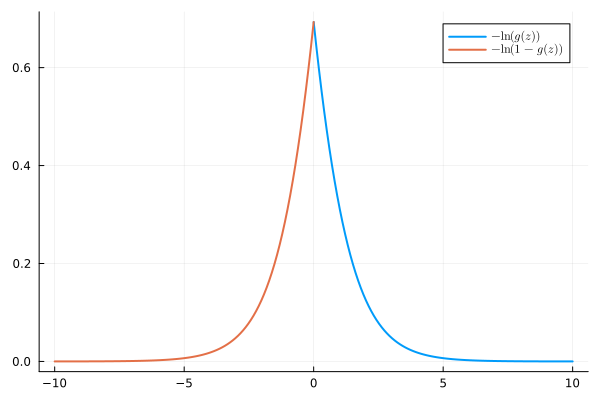

In [54]:
z = range(0, 10, length=100)
g(z) = 1/(1 + ℯ^(-z))
L(z)= -log(g(z))
plot(z, L.(z),linewidth=2, label = L"-\ln{(g(z))}")

z = range(-10, 0, length=100)
g(z) = 1/(1 + ℯ^(-z))
L(z)= -log(1-g(z))
plot!(z, L.(z),linewidth=2, label = L"-\ln{(1-g(z))}")

This Loss function guarantee that gradient descent has a global minimum as we wish and so we can define a coss function from it.
$$J_x(\mathbf a,b) = \dfrac{1}{n}\sum_{i=1}^n L(g_{x}(\mathbf a, b), y^i)$$
But remember that $y^i$ just can be $0$ or $1$, with this information in mind we can rewrite the express above as:
$$J_x(\mathbf a,b) = -\dfrac{1}{n}\sum_{i=1}^n y^i\ln{(g_x(\mathbf a,b))}+(1-y^i)\ln{(1-g_x(\mathbf a,b))}.$$
This equation cames from $\color{red}\text{Maximum likelihood estimation}$.

We want to find the $\min_{a,b}J_x(a,b)$, for this we:
<ol>
    <li>Give an initial a, b
    <li>Keep changing a, b to reduce J(a, b)
    <li>Until we settle at or near a minimum (sometimes we will have more the one minimum)
</ol>

The changing on the variables will be done though: $a^i \leftarrow a^i - \alpha\dfrac{\partial J(a^i)}{\partial a^i}$, with $\alpha$ being the <u>learning rate</u>.

In [ ]:
# Importing the libraries
using Pkg
using Plots
using LinearAlgebra
using LaTeXStrings
using Distributions
using ForwardDiff

In [4]:
gₓ(a,b) = 1\(1+ℯ^(-1*(a*x .+ b)))

gₓ (generic function with 1 method)

In [ ]:
Jₓ(a, b) = -(1/(NUMBER_OF_POINTS)) * sum(y*log(gₓ(a,b)) + (1-y)*log(1-gₓ(a,b)))

In [3]:
function ∇(a, b)
    w = [a; b]
    Jₓ(w) = -(1/(NUMBER_OF_POINTS)) * sum(y*log(gₓ(w[1],w[2])) + (1-y)*log(1-gₓ(w[1],w[2])))
    result = ForwardDiff.gradient(Jₓ, w)
    return result[1], result[2]
end

∇ (generic function with 1 method)

In [ ]:
function gradient_descent(a, b, αₐ, αᵦ, n)
    for n ∈ 1:n 
        a = a - αₐ.*∇(a, b)[1]
        b = b - αᵦ*∇(a, b)[2]
    end
    return a, b
end

Sometimes it is interesting to change the value of the threshold in order to make our confusion matrix values better.

|  | Real | values |
|---|---|---|
| **Predicted** | **TP** | **FP** |
|  | **FN** | **TN** |

True positive rate
$$\mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR}$$
False positive rate 
$$\mathrm {FNR} ={\frac {\mathrm {FN} }{\mathrm {P} }}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR}$$ 

###We can draw a curve in a graphic $(FNR, TPR)$ for each threshold (actually we can do even for other methods like the KNN); and the curve, the $ROC$, that has the largest area under the curve will be the best model!